In [3]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Predicting the department-wide sales for each store for the following year

In [7]:
import pandas as pd

from statsmodels.tsa.statespace.sarimax import SARIMAX
import snowflake.connector  # Snowflake Connector
from sqlalchemy import create_engine

# Snowflake connection parameters
snowflake_config = {
    'user': 'ZAKSNOW003',
    'password': 'zakFLAKE234:',
    'account': 'LOGBRMA-IP76163',
    'warehouse': 'COMPUTE_WH',
    'database': 'BREATH_RETAIL_STORES',
    'schema': 'RETAIL_DATA',
}

# Establish Snowflake connection
conn = snowflake.connector.connect(**snowflake_config)


# # SQLAlchemy connection URI for Snowflake
# engine = create_engine(f'snowflake://{snowflake_config["user"]}:{snowflake_config["password"]}@{snowflake_config["account"]}/{snowflake_config["database"]}/{snowflake_config["schema"]}?warehouse={snowflake_config["warehouse"]}')


# Assuming your aggregated sales data is stored in Snowflake with a table named 'sales'
sales_query = '''
    select "Store", "Dept", "Date", sum("Weekly_Sales") as Total_Sales
    from BREATH_RETAIL_STORES.retail_data.sales
    GROUP BY "Store", "Dept", "Date"
'''

# Execute query and read into DataFrame
sales_df = pd.read_sql_query(sales_query, conn)

# # Execute query and read into DataFrame
# sales_df = pd.read_sql_query(sales_query, engine)

# Close Snowflake connection
conn.close()

# # Convert 'Date' to datetime
# sales_df['Date'] = pd.to_datetime(sales_df['Date'])


# # Train SARIMA model
# sarima_model = SARIMAX(sales_df['Total_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# sarima_result = sarima_model.fit(disp=False)

# # Make predictions for the following year
# predictions = sarima_result.get_forecast(steps=52)  # Assuming 52 weeks in a year


/var/folders/5b/sgxl23p16bb9fjtjq5f_k8zh0000gn/T/ipykernel_7003/3720466531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/5b/sgxl23p16bb9fjtjq5f_k8zh0000gn/T/ipykernel_7003/3720466531.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql_query(sales_query, conn)


In [8]:
sales_df

,Store,Dept,Date,TOTAL_SALES
0,1,1,05/02/2010,24924.50
1,1,1,12/02/2010,46039.49
2,1,1,19/02/2010,41595.55
3,1,1,26/02/2010,19403.54
4,1,1,05/03/2010,21827.90
...,...,...,...,...
421565,45,92,01/06/2012,42882.18
421566,45,92,19/10/2012,48108.38
421567,45,93,02/12/2011,1279.26
421568,45,95,23/03/2012,49554.61


In [9]:
# Convert 'Date' to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
sales_df

# # Set 'Date' as the index
# sales_df.set_index('Date', inplace=True)
# sales_df


,Store,Dept,Date,TOTAL_SALES
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90
...,...,...,...,...
421565,45,92,2012-06-01,42882.18
421566,45,92,2012-10-19,48108.38
421567,45,93,2011-12-02,1279.26
421568,45,95,2012-03-23,49554.61


In [10]:
# # Train SARIMA model
# sarima_model = SARIMAX(sales_df['TOTAL_SALES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
#                       enforce_stationarity=False, enforce_invertibility=False)
# sarima_result = sarima_model.fit(disp=False)

# # Create a DataFrame with future dates for prediction
# future_dates = pd.date_range(start=sales_df.index[-1] + pd.Timedelta(days=7), periods=52, freq='W-Fri')
# future_df = pd.DataFrame(index=future_dates)

# # Make predictions for the following year
# predictions = sarima_result.get_forecast(steps=52, exog=future_df.index).predicted_mean

In [11]:
# Rename columns for Prophet compatibility
# sales_df = sales_df.rename(columns={'Date': 'ds', 'Total_Sales': 'y'})
# Rename columns for Prophet compatibility
sales_df = sales_df.rename(columns={'Date': 'ds', 'TOTAL_SALES': 'y'})

sales_df

,Store,Dept,ds,y
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90
...,...,...,...,...
421565,45,92,2012-06-01,42882.18
421566,45,92,2012-10-19,48108.38
421567,45,93,2011-12-02,1279.26
421568,45,95,2012-03-23,49554.61


In [12]:
from prophet import Prophet

/Users/mac/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [13]:


# Instantiate and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(sales_df)

09:42:46 - cmdstanpy - INFO - Chain [1] start processing
09:43:13 - cmdstanpy - INFO - Chain [1] done processing


/Users/mac/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/mac/Library/Python/3.9/lib/python/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


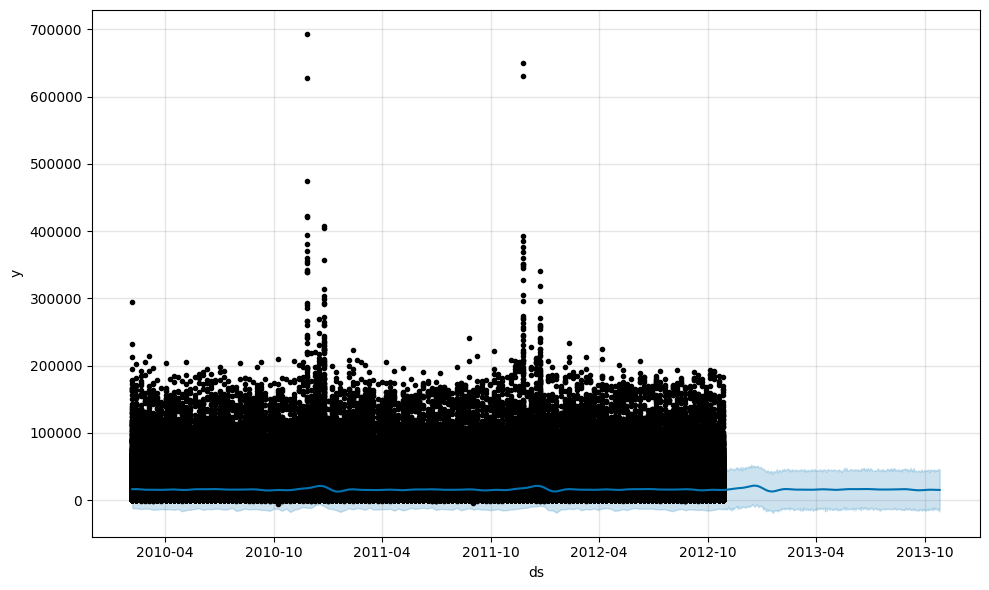

In [14]:
# Create a DataFrame with future dates for prediction
future = prophet_model.make_future_dataframe(periods=365)  # Assuming 365 days for the next year

# Generate predictions
forecast = prophet_model.predict(future)

# Plot the forecast
fig = prophet_model.plot(forecast)

## Modeling the effects of markdowns on holiday weeks

In [15]:
pip install snowflake-connector-python pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from snowflake.connector import connect
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set up Snowflake connection parameters
snowflake_config = {
    'user': 'ZAKSNOW003',
    'password': 'zakFLAKE234:',
    'account': 'LOGBRMA-IP76163',
    'warehouse': 'COMPUTE_WH',
    'database': 'BREATH_RETAIL_STORES',
    'schema': 'RETAIL_DATA',
}

# Connect to Snowflake
conn = connect(**snowflake_config)
cursor = conn.cursor()

# Execute SQL query to get the data
query = '''
SELECT f."Store", f."Date", f."MarkDown1", f."MarkDown2", f."MarkDown3", f."MarkDown4", f."MarkDown5", 
s."Weekly_Sales", f."IsHoliday"
FROM BREATH_RETAIL_STORES.retail_data.Features f
JOIN BREATH_RETAIL_STORES.retail_data.Sales s ON f."Store" = s."Store" AND f."Date" = s."Date";
'''

# Fetch data into a Pandas DataFrame
merged_data = pd.read_sql(query, conn)

# Close the cursor and connection
cursor.close()
conn.close()



/var/folders/5b/sgxl23p16bb9fjtjq5f_k8zh0000gn/T/ipykernel_7003/1108260166.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  merged_data = pd.read_sql(query, conn)


In [17]:
merged_data

,Store,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales,IsHoliday
0,1,05/02/2010,NaN,NaN,NaN,NaN,NaN,24924.50,False
1,1,12/02/2010,NaN,NaN,NaN,NaN,NaN,46039.49,True
2,1,19/02/2010,NaN,NaN,NaN,NaN,NaN,41595.55,False
3,1,26/02/2010,NaN,NaN,NaN,NaN,NaN,19403.54,False
4,1,05/03/2010,NaN,NaN,NaN,NaN,NaN,21827.90,False
...,...,...,...,...,...,...,...,...,...
421565,45,28/09/2012,4556.61,20.64,1.50,1601.01,3288.25,508.37,False
421566,45,05/10/2012,5046.74,NaN,18.82,2253.43,2340.01,628.10,False
421567,45,12/10/2012,1956.28,NaN,7.89,599.32,3990.54,1061.02,False
421568,45,19/10/2012,2004.02,NaN,3.18,437.73,1537.49,760.01,False


In [19]:
from sklearn.impute import SimpleImputer

# Assuming your merged_data DataFrame has NaN values
# Check and handle missing values
if merged_data.isnull().values.any():
    # Use SimpleImputer to fill NaN values with the mean
    imputer = SimpleImputer(strategy='most_frequent')
    merged_data_filled = pd.DataFrame(imputer.fit_transform(merged_data), columns=merged_data.columns)
else:
    merged_data_filled = merged_data.copy()

# Continue with Python code for regression analysis
# Prepare data for regression analysis
X = merged_data_filled[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']]
y = merged_data_filled['Weekly_Sales']

# merged_data = merged_data.dropna()


# # Continue with Python code for regression analysis
# # Prepare data for regression analysis
# X = merged_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday']]
# y = merged_data['Weekly_Sales']

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

X

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday
0,1.5,1.91,3.0,9.0,2743.18,False
1,1.5,1.91,3.0,9.0,2743.18,True
2,1.5,1.91,3.0,9.0,2743.18,False
3,1.5,1.91,3.0,9.0,2743.18,False
4,1.5,1.91,3.0,9.0,2743.18,False
...,...,...,...,...,...,...
421565,4556.61,20.64,1.5,1601.01,3288.25,False
421566,5046.74,1.91,18.82,2253.43,2340.01,False
421567,1956.28,1.91,7.89,599.32,3990.54,False
421568,2004.02,1.91,3.18,437.73,1537.49,False


In [23]:
# Train linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
predictions = reg_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 518249546.72100383


In [24]:
# Display coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg_model.coef_
})
print(coefficients)

     Feature  Coefficient
0  MarkDown1     0.152293
1  MarkDown2     0.048152
2  MarkDown3     0.149281
3  MarkDown4    -0.040854
4  MarkDown5     0.273588
5  IsHoliday   187.296253


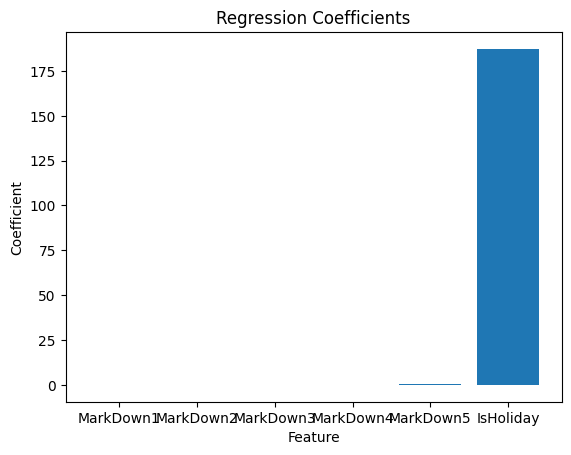

In [25]:
import matplotlib.pyplot as plt

# Visualize coefficients
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Regression Coefficients')
plt.show()
